In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib.mlab import csv
import matplotlib.cbook as cbook
from matplotlib.ticker import Formatter

3D散点图

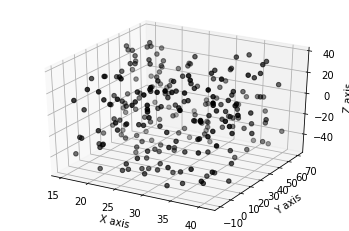

In [26]:
# do it
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
n=250
f=lambda minval,maxval,n:minval+(maxval-minval)*np.random.rand(n)
x_vals=f(15,41,n)
y_vals=f(-10,70,n)
z_vals=f(-52,37,n)
ax.scatter(x_vals,y_vals,z_vals,c='k',marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

气泡图

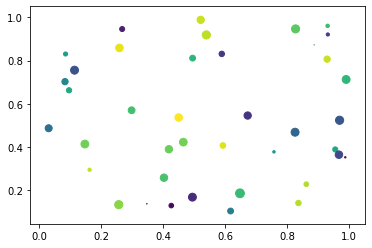

In [34]:
# do it
num_vals=40
x=np.random.rand(num_vals)
y=np.random.rand(num_vals)
max_radius=25
area=np.pi*(max_radius*np.random.rand(num_vals))
colors=np.random.rand(num_vals)
plt.scatter(x,y,s=area,c=colors,alpha=1.0)
plt.show()

动态气泡图

In [41]:
def tracker(cur_num):
    # Get the current index 
    cur_index = cur_num % num_points

    # Set the color of the datapoints 
    datapoints['color'][:, 3] = 1.0

    # Update the size of the circles 
    datapoints['size'] += datapoints['growth']

    # Update the position of the oldest datapoint 
    datapoints['position'][cur_index] = np.random.uniform(0, 1, 2)
    datapoints['size'][cur_index] = 7
    datapoints['color'][cur_index] = (0, 0, 0, 1)
    datapoints['growth'][cur_index] = np.random.uniform(40, 150)

    # Update the parameters of the scatter plot 
    scatter_plot.set_edgecolors(datapoints['color'])
    scatter_plot.set_sizes(datapoints['size'])
    scatter_plot.set_offsets(datapoints['position'])

c:\users\root\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  # This is added back by InteractiveShellApp.init_path()


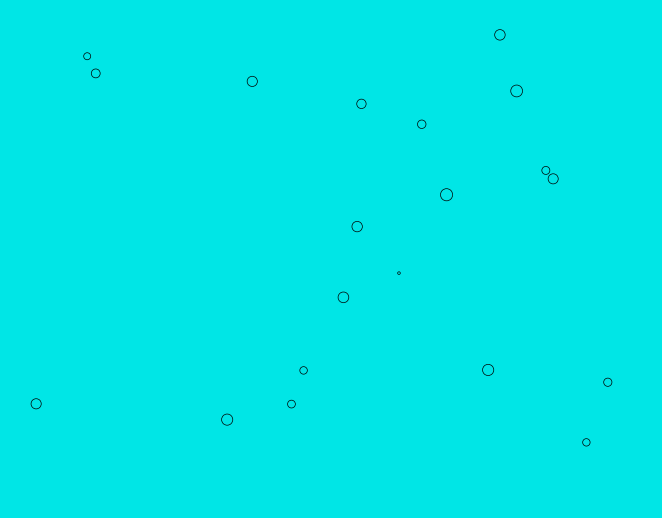

In [44]:
if __name__=='__main__':
    fig = plt.figure(figsize=(9, 7), facecolor=(0,0.9,0.9))
    ax = fig.add_axes([0, 0, 1, 1], frameon=False)
    ax.set_xlim(0, 1), ax.set_xticks([])
    ax.set_ylim(0, 1), ax.set_yticks([])

    # Create and initialize the datapoints in random positions 
    # and with random growth rates.
    num_points = 20
    datapoints = np.zeros(num_points, dtype=[('position', float, 2),
            ('size', float, 1), ('growth', float, 1), ('color', float, 4)])
    datapoints['position'] = np.random.uniform(0, 1, (num_points, 2))
    datapoints['growth'] = np.random.uniform(40, 150, num_points)

    # Construct the scatter plot that will be updated every frame
    scatter_plot = ax.scatter(datapoints['position'][:, 0], datapoints['position'][:, 1],
                      s=datapoints['size'], lw=0.7, edgecolors=datapoints['color'],
                      facecolors='none')

    # Start the animation using the 'tracker' function 
    animation = FuncAnimation(fig, tracker, interval=10)

    plt.show()

饼图

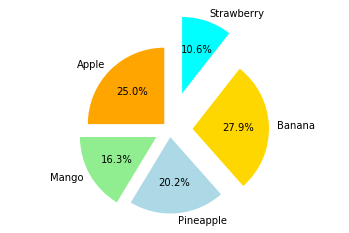

In [48]:
data = {'Apple': 26, 
        'Mango': 17,
        'Pineapple': 21, 
        'Banana': 29, 
        'Strawberry': 11}
colors = ['orange', 'lightgreen', 'lightblue', 'gold', 'cyan']
explode = (0.1, 0.2, 0.1, 0.3, 0.5)  
plt.pie(data.values(), explode=explode, labels=data.keys(), 
        colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

日期格式的时间序列数据

In [57]:
# Define a class for formatting
class DataFormatter(Formatter):
    def __init__(self, dates, date_format='%Y-%m-%d'):
        self.dates = dates
        self.date_format = date_format

    # Extact the value at time t at position 'position'
    def __call__(self, t, position=0):
        index = int(round(t))
        if index >= len(self.dates) or index < 0:
            return ''

        return self.dates[index].strftime(self.date_format)

if __name__=='__main__':
    # CSV file containing the stock quotes 
    input_file = cbook.get_sample_data('aapl.csv', asfileobj=False)

    # Load csv file into numpy record array
    data = csv(input_file)
    
    # Take a subset for plotting
    data = data[-70:]

    # Create the date formatter object
    formatter = DataFormatter(data.date)

    # X axis
    x_vals = numpy.arange(len(data))

    # Y axis values are the closing stock quotes
    y_vals = data.close 

    # Plot data
    fig, ax = plt.subplots()
    ax.xaxis.set_major_formatter(formatter)
    ax.plot(x_vals, y_vals, 'o-')
    fig.autofmt_xdate()
    plt.show()

NameError: name 'csv2rec' is not defined

直方图

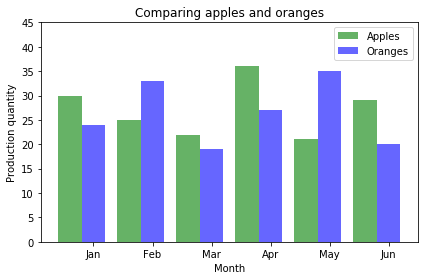

In [49]:
apples = [30, 25, 22, 36, 21, 29]
oranges = [24, 33, 19, 27, 35, 20]
num_groups = len(apples)
fig, ax = plt.subplots()
indices = np.arange(num_groups)
bar_width = 0.4
opacity = 0.6
hist_apples = plt.bar(indices, apples, bar_width, 
        alpha=opacity, color='g', label='Apples')
hist_oranges = plt.bar(indices + bar_width, oranges, bar_width,
        alpha=opacity, color='b', label='Oranges')
plt.xlabel('Month')
plt.ylabel('Production quantity')
plt.title('Comparing apples and oranges')
plt.xticks(indices + bar_width, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'))
plt.ylim([0, 45])
plt.legend()
plt.tight_layout()
plt.show()

可视化热力图

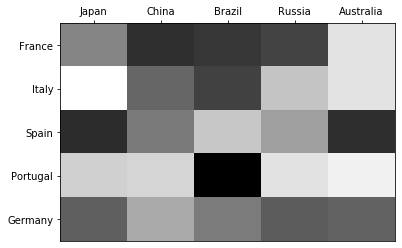

In [6]:
group1 = ['France', 'Italy', 'Spain', 'Portugal', 'Germany'] 
group2 = ['Japan', 'China', 'Brazil', 'Russia', 'Australia']
data = np.random.rand(5, 5)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.gray)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(group2, minor=False)
ax.set_yticklabels(group1, minor=False)
# plt.colorbar(ax)
plt.show()

动态信号的可视化模拟

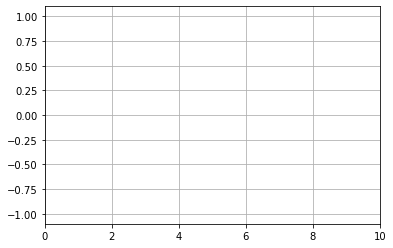

In [53]:
def generate_data(length=2500, t=0, step_size=0.05):
    for count in range(length):
        t += step_size
        signal = np.sin(2*np.pi*t)
        damper = np.exp(-t/8.0)
        yield t, signal * damper 

# Initializer function
def initializer():
    peak_val = 1.0
    buffer_val = 0.1
    ax.set_ylim(-peak_val * (1 + buffer_val), peak_val * (1 + buffer_val))
    ax.set_xlim(0, 10)
    del x_vals[:]
    del y_vals[:]
    line.set_data(x_vals, y_vals)
    return line

def draw(data):
    # update the data
    t, signal = data
    x_vals.append(t)
    y_vals.append(signal)
    x_min, x_max = ax.get_xlim()

    if t >= x_max:
        ax.set_xlim(x_min, 2 * x_max)
        ax.figure.canvas.draw()

    line.set_data(x_vals, y_vals)

    return line

if __name__=='__main__':
    # Create the figure
    fig, ax = plt.subplots()
    ax.grid()

    # Extract the line
    line, = ax.plot([], [], lw=1.5)

    # Create the variables
    x_vals, y_vals = [], []

    # Define the animator object
    animator = animation.FuncAnimation(fig, draw, generate_data, 
            blit=False, interval=10, repeat=False, init_func=initializer)

    plt.show()